# Imports

In [84]:
%matplotlib inline
import pandas as pd
pd.options.mode.chained_assignment = None
from math import*
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import folium.plugins 
from folium.plugins import HeatMap
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from folium.plugins import HeatMap
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn

# Leitura da planilha e "limpeza"

In [85]:
df = pd.read_excel('dados.xlsx')
df.head(10)

,ID,Situação de rua,Onde dormiu ontem,Tempo de permanência,Sexo,Identifica com o sexo nasceu,Idade,Faixa de idade,Classificação de idade,Cor_Raça_Etnia,...,Tempo na situação,Tipo de ponto,Presença_Moradia_Improvisada,Criança_acomp_Adulto,Criança_Sozinha,Latitude,Longitude,Data,Subprefeitura,Distrito
0,1,Rua,Não se aplica,Não se aplica,Feminino,Não respondeu,Não respondeu,Sem informação,Sem informação,Sem identificação,...,NR/NS,Praça,Não,Não,Não,-23.496278,-46.391831,2021-10-25,Itaim Paulista,Itaim Paulista
1,2,Acolhido,Rua,Não se aplica,Masculino,Homem Cisgênero,38,31 a 49,Adulto,Parda,...,Mais de 10 anos,Não se aplica,Não se aplica,Não se aplica,Não se aplica,-23.522517,-46.522712,2021-10-25,Penha,Penha
2,3,Rua,Não se aplica,Não se aplica,Feminino,Mulher Cisgênero,27,18 a 30,Juventude,Parda,...,Mais de 2 anos até 5 anos,Praça,Sim,Não,Não,-23.523293,-46.654984,2021-11-03,Sé,Santa Cecília
3,4,Rua,Não se aplica,Não se aplica,Masculino,Homem Cisgênero,15,12 a 17,Adolescente,Branca,...,Mais de 5 anos até 10 anos,Calçada,Sim,Não,Não,-23.743078,-46.692948,2021-10-27,Capela do Socorro,Grajaú
4,5,Rua,Não se aplica,Não se aplica,Feminino,Mulher Cisgênero,Não respondeu,Sem informação,Sem informação,Sem identificação,...,NR/NS,Canteiro central,Sim,Não,Não,-23.525142,-46.625523,2021-11-09,Mooca,Pari
5,6,Rua,Não se aplica,Não se aplica,Feminino,Não respondeu,Não respondeu,Sem informação,Sem informação,Branca,...,NR/NS,Calçada,Sim,Não,Não,-23.550055,-46.631792,2021-11-04,Sé,Sé
6,7,Rua,Não se aplica,Não se aplica,Masculino,Homem Cisgênero,43,31 a 49,Adulto,Branca,...,Mais de 2 anos até 5 anos,Baixos de Viaduto,Sim,Não,Não,-23.509792,-46.624871,2021-10-21,Santana-Tucuruvi,Santana
7,8,Rua,Não se aplica,Não se aplica,Masculino,Não respondeu,Não respondeu,Sem informação,Sem informação,Sem identificação,...,NR/NS,Calçada,Sim,Sim,Sim,-23.533531,-46.643104,2021-11-03,Sé,Santa Cecília
8,9,Acolhido,Neste centro de acolhida (aqui),Mais de 6 meses,Feminino,Mulher Cisgênero,44,31 a 49,Adulto,Branca,...,Mais de 5 anos até 10 anos,Não se aplica,Não se aplica,Não se aplica,Não se aplica,-23.534555,-46.600631,2021-11-08,Mooca,Belém
9,10,Rua,Não se aplica,Não se aplica,Masculino,Não respondeu,50,50 a 59,Adulto,Branca,...,Mais de 6 meses até 1 ano,Calçada,Sim,Não,Não,-23.552632,-46.611866,2021-11-08,Mooca,Brás


In [86]:
df.columns

Index(['ID', 'Situação de rua', 'Onde dormiu ontem', 'Tempo de permanência',
       'Sexo', 'Identifica com o sexo nasceu', 'Idade', 'Faixa de idade',
       'Classificação de idade', 'Cor_Raça_Etnia', 'Parentes no CA',
       'Tempo na situação', 'Tipo de ponto', 'Presença_Moradia_Improvisada',
       'Criança_acomp_Adulto', 'Criança_Sozinha', 'Latitude', 'Longitude',
       'Data', 'Subprefeitura', 'Distrito'],
      dtype='object')

In [87]:
df.Subprefeitura = df.Subprefeitura.replace("M'boi Mirim", "M'Boi Mirim")

# Analise Exploratória sobre Subprefeituras

In [88]:
print(pd.Series(df.Subprefeitura.value_counts()))

Sé                           12851
Mooca                         5811
Vila Maria-Vila Guilherme     1238
Santana-Tucuruvi              1232
Santo Amaro                   1090
Lapa                          1062
Vila Mariana                   972
Penha                          583
Itaquera                       549
Pinheiros                      545
Ipiranga                       544
Casa Verde-Cachoeirinha        539
São Miguel                     417
Aricanduva-Formosa-Carrão      407
Guaianases                     391
Campo Limpo                    348
Ermelino Matarazzo             346
Jabaquara                      345
Capela do Socorro              340
Vila Prudente                  303
Jaçanã-Tremembé                297
São Mateus                     288
Butantã                        263
Cidade Ademar                  193
Itaim Paulista                 186
Freguesia-Brasilândia          165
M'Boi Mirim                    143
Cidade Tiradentes              134
Perus               

In [89]:
df = df.loc[(df.Subprefeitura != 'Sapopemba')].reset_index(drop=True)

df

,ID,Situação de rua,Onde dormiu ontem,Tempo de permanência,Sexo,Identifica com o sexo nasceu,Idade,Faixa de idade,Classificação de idade,Cor_Raça_Etnia,...,Tempo na situação,Tipo de ponto,Presença_Moradia_Improvisada,Criança_acomp_Adulto,Criança_Sozinha,Latitude,Longitude,Data,Subprefeitura,Distrito
0,1,Rua,Não se aplica,Não se aplica,Feminino,Não respondeu,Não respondeu,Sem informação,Sem informação,Sem identificação,...,NR/NS,Praça,Não,Não,Não,-23.496278,-46.391831,2021-10-25,Itaim Paulista,Itaim Paulista
1,2,Acolhido,Rua,Não se aplica,Masculino,Homem Cisgênero,38,31 a 49,Adulto,Parda,...,Mais de 10 anos,Não se aplica,Não se aplica,Não se aplica,Não se aplica,-23.522517,-46.522712,2021-10-25,Penha,Penha
2,3,Rua,Não se aplica,Não se aplica,Feminino,Mulher Cisgênero,27,18 a 30,Juventude,Parda,...,Mais de 2 anos até 5 anos,Praça,Sim,Não,Não,-23.523293,-46.654984,2021-11-03,Sé,Santa Cecília
3,4,Rua,Não se aplica,Não se aplica,Masculino,Homem Cisgênero,15,12 a 17,Adolescente,Branca,...,Mais de 5 anos até 10 anos,Calçada,Sim,Não,Não,-23.743078,-46.692948,2021-10-27,Capela do Socorro,Grajaú
4,5,Rua,Não se aplica,Não se aplica,Feminino,Mulher Cisgênero,Não respondeu,Sem informação,Sem informação,Sem identificação,...,NR/NS,Canteiro central,Sim,Não,Não,-23.525142,-46.625523,2021-11-09,Mooca,Pari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31835,31880,Acolhido,Neste centro de acolhida (aqui),Entre 1 mês e 3 meses,Masculino,Homem Cisgênero,53,50 a 59,Adulto,Parda,...,Mais de 5 anos até 10 anos,Não se aplica,Não se aplica,Não se aplica,Não se aplica,-23.573725,-46.505001,2021-11-09,Aricanduva-Formosa-Carrão,Aricanduva
31836,31881,Rua,Não se aplica,Não se aplica,Masculino,Homem Cisgênero,60,60 a 69,Idoso,Preta,...,Entre 1 semana e 1 mês,Outro,Não,Não,Não,-23.506855,-46.571922,2021-10-21,Vila Maria-Vila Guilherme,Vila Maria
31837,31882,Rua,Não se aplica,Não se aplica,Masculino,Homem Cisgênero,38,31 a 49,Adulto,Parda,...,Mais de 1 ano até 2 anos,Área externa de imóvel (recuo de garagem),Não,Não,Não,-23.671142,-46.768861,2021-11-10,Campo Limpo,Capão Redondo
31838,31883,Acolhido,Neste centro de acolhida (aqui),Entre 3 meses e 6 meses,Masculino,Homem Cisgênero,35,31 a 49,Adulto,Parda,...,Mais de 2 anos até 5 anos,Não se aplica,Não se aplica,Não se aplica,Não se aplica,-23.754310,-46.683435,2021-10-26,Capela do Socorro,Grajaú


In [90]:
sub_x_situacao = pd.crosstab(df['Situação de rua'],df.Subprefeitura, normalize='columns')


In [91]:
acolhidos = []
rua = []

for i in sub_x_situacao:
    acolhidos.append(round(sub_x_situacao[i][0],2)*100)
    rua.append(round(sub_x_situacao[i][1],2)*100)


TypeError: __init__() got an unexpected keyword argument 'ncols'

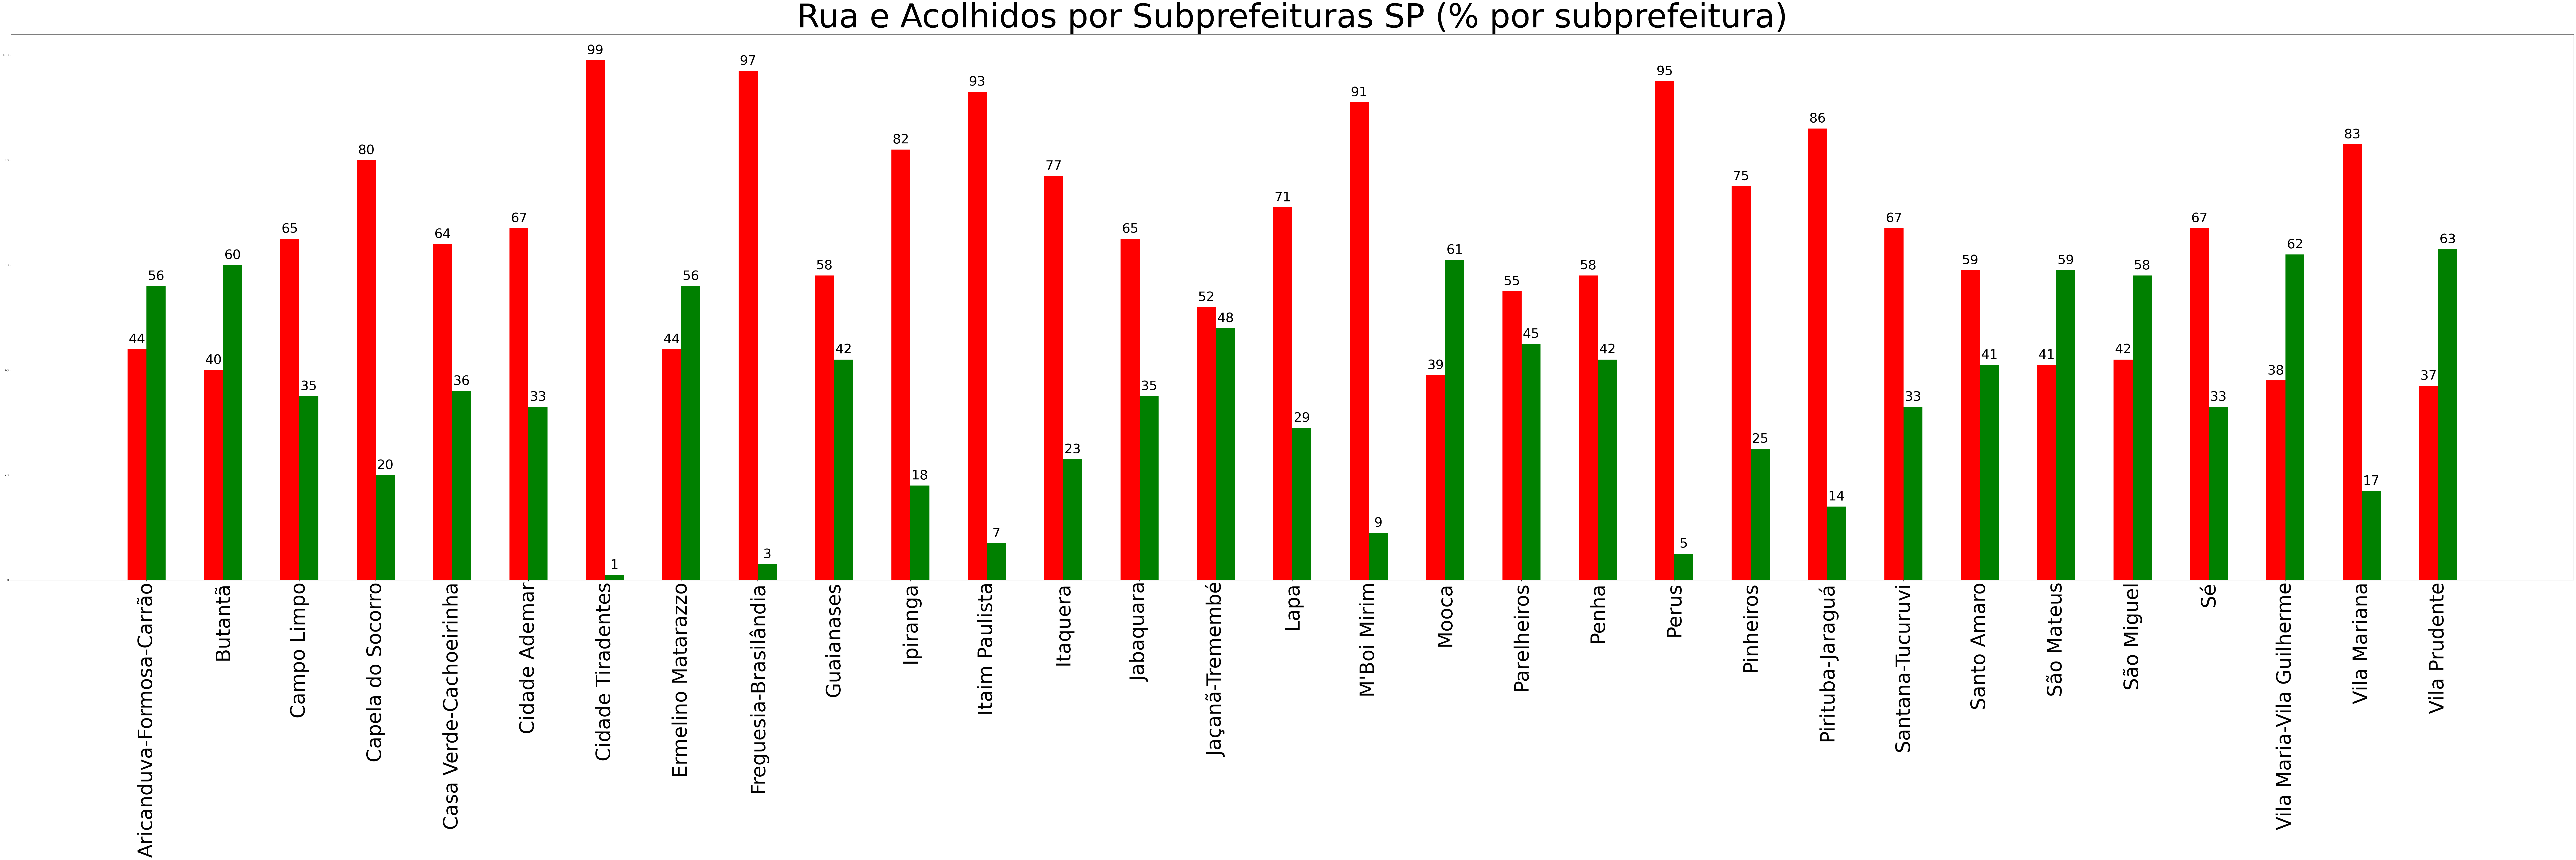

In [92]:
subprefeituras = list(sub_x_situacao)

situacao = {
    'Situação de Rua': rua,
    'Acolhidos': acolhidos
}

x = np.arange(len(subprefeituras))  # the label locations
width = 0.25 # the width of the bars
multiplier = 0

fig, ax = plt.subplots(1,1,figsize=(140,30))
c = 'red'
for attribute, measurement in situacao.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, color=c)
    ax.bar_label(rects, padding=10, fontsize="40")
    multiplier += 1
    c = 'green'


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Rua e Acolhidos por Subprefeituras SP (% por subprefeitura)', fontsize="100")
ax.set_xticks(x + width - 0.1255, subprefeituras, fontsize="60", rotation=90)
ax.legend(loc='upper left', ncols=2, fontsize="50")
ax.set_ylim(0, 100)

plt.show()

In [ ]:
df_sexo = df.loc[(df.Sexo != 'Sem identificação')]
sexo_x_situacao = dict(pd.crosstab(df_sexo['Situação de rua'],df_sexo.Sexo, normalize='columns'))


acolhidos = []
rua = []

for i in sexo_x_situacao:
    acolhidos.append(round(sexo_x_situacao[i][0],2)*100)
    rua.append(round(sexo_x_situacao[i][1],2)*100)


subprefeituras = list(sexo_x_situacao)

situacao = {
    'Situação de Rua': rua,
    'Acolhidos': acolhidos
}

x = np.arange(len(subprefeituras))  # the label locations
width = 0.25 # the width of the bars
multiplier = 0

fig, ax = plt.subplots(1,1,figsize=(15,10))
c = 'red'
for attribute, measurement in situacao.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, color=c)
    ax.bar_label(rects, padding=10, fontsize="15")
    multiplier += 1
    c = 'green'


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Rua e Acolhidos por Sexo em SP', fontsize="20")
ax.set_xticks(x + width - 0.1255, subprefeituras, fontsize="15", rotation=90)
ax.legend(loc='upper left', ncols=2, fontsize="15")
ax.set_ylim(0, 100)
plt.ylabel('% de pessoas', fontsize='15')

plt.show()

---
## Socioeconomicas
---

In [ ]:
df_socio = pd.read_excel('socio.xlsx')
df_socio

In [ ]:
df_socio_2010 = df_socio[(df_socio.ANO == 2010)]
list(df_socio_2010.NOME_REG)

In [ ]:
dict_replace = {
'Aricanduva / Vila Formosa': 'Aricanduva-Formosa-Carrão',
'Casa Verde': 'Casa Verde-Cachoeirinha',
'Freguesia do Ó / Brasilândia': 'Freguesia-Brasilândia',
'Jaçanã / Tremembé': 'Jaçanã-Tremembé',
'Pirituba / Jaraguá': 'Pirituba-Jaraguá',
'Santana / Tucuruvi': 'Santana-Tucuruvi',
'São Miguel Paulista': 'São Miguel',
'Vila Maria / Vila Guilherme': 'Vila Maria-Vila Guilherme',
}

df_socio_2010 = df_socio_2010.replace(dict_replace)

In [ ]:
df_socio_2010

In [ ]:
df_socio_usar = df_socio_2010.loc[:,['NOME_REG','IDHM','I_ESCOLARIDADE','I_FREQ_PROP','POP','PEA18M','T_FUNDIN_TODOS_MMEIO','AGUA_ESGOTO','RENOCUP','RDPC','PPOB','GINI','RAZDEP']]

df_socio_usar

In [ ]:
colunas_usar = ['IDHM','I_ESCOLARIDADE','I_FREQ_PROP','POP','PEA18M','T_FUNDIN_TODOS_MMEIO','AGUA_ESGOTO','RENOCUP','RDPC','PPOB','GINI','RAZDEP']

In [ ]:
for i in colunas_usar:
    df[str(i)] = 0

for i in range (31,62):
    for j in range(len(df)):
        if df.Subprefeitura[j] == df_socio_usar["NOME_REG"][i]:
            for c in colunas_usar:
                df[str(c)][j] = df_socio_usar[str(c)][i]



In [ ]:
df

In [ ]:
df_encoded.columns

In [ ]:
#Função para separar as variaveis 

df_encoded = pd.get_dummies(df, columns=['Sexo', 'Classificação de idade', 'Cor_Raça_Etnia','Tempo na situação','Parentes no CA'])

lista = ['Sexo_Feminino', 'Sexo_Masculino', 'Sexo_Sem identificação',
'Classificação de idade_Criança', 'Classificação de idade_Adolescente',
'Classificação de idade_Juventude', 'Classificação de idade_Adulto',
'Classificação de idade_Idoso',
'Classificação de idade_Sem informação', 'Cor_Raça_Etnia_Amarela',
'Cor_Raça_Etnia_Branca', 'Cor_Raça_Etnia_Indígena',
'Cor_Raça_Etnia_Não respondeu', 'Cor_Raça_Etnia_Parda',
'Cor_Raça_Etnia_Preta', 'Cor_Raça_Etnia_Sem identificação',
'Tempo na situação_Até 1 semana',
'Tempo na situação_Entre 1 semana e 1 mês',
'Tempo na situação_Mais de 1 ano até 2 anos',
'Tempo na situação_Mais de 1 mês até 6 meses',
'Tempo na situação_Mais de 10 anos',
'Tempo na situação_Mais de 2 anos até 5 anos',
'Tempo na situação_Mais de 5 anos até 10 anos',
'Tempo na situação_Mais de 6 meses até 1 ano',
'Tempo na situação_NR/NS', 'Parentes no CA_Não',
'Parentes no CA_Não informado', 'Parentes no CA_Sim','IDHM','I_ESCOLARIDADE','I_FREQ_PROP',
'T_FUNDIN_TODOS_MMEIO','AGUA_ESGOTO','RENOCUP','RDPC','PPOB','GINI','RAZDEP']

def splitdataset(df): 

    # Separating the target variable 
    X = df[lista] 
    Y = df['Situação de rua'] 

    # Splitting the dataset into train and test 
    X_train, X_test, y_train, y_test = train_test_split(  
    X, Y, test_size = 0.1, random_state = 100) 
        
    return X, Y, X_train, X_test, y_train, y_test 

# Function to perform training with giniIndex. 
def train_using_gini(X_train, X_test, y_train): 

    # Creating the classifier object 
    clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=100, min_samples_leaf=50) 

    # Performing training 
    clf_gini.fit(X_train, y_train)

    return clf_gini 
        
# Function to perform training with entropy. 
def train_using_entropy(X_train, X_test, y_train): 

    # Decision tree with entropy 
    clf_entropy = DecisionTreeClassifier( 
            criterion = "entropy", random_state = 100, 
            max_depth = 100, min_samples_leaf = 50) 

    # Performing training 
    clf_entropy.fit(X_train, y_train) 
    return clf_entropy 

# Function to make predictions 
def prediction(X_test, clf_object): 

    # Predicton on test with giniIndex 
    y_pred = clf_object.predict(X_test) 
    print("Predicted values:") 
    print(y_pred) 
    return y_pred 
        
# Function to calculate accuracy 
def cal_accuracy(y_test, y_pred): 
        
    print("Confusion Matrix: ", 
        confusion_matrix(y_test, y_pred)) 
        
    print ("Accuracy : ", 
    accuracy_score(y_test,y_pred)*100) 
        
    print("Report : ", 
    classification_report(y_test, y_pred)) 

# Driver code 
def main(df): 

    # Building Phase 
    data = df 
    X, Y, X_train, X_test, y_train, y_test = splitdataset(data) 
    clf_gini = train_using_gini(X_train, X_test, y_train) 
    clf_entropy = train_using_entropy(X_train, X_test, y_train) 
    print('-'*20, 'Test', '-'*20)           
    # Operational Phase 
    print("Results Using Gini Index:") 
        
    # Prediction using gini 
    y_pred_gini = prediction(X_test, clf_gini) 
    cal_accuracy(y_test, y_pred_gini) 
        
    print("Results Using Entropy:") 
    # Prediction using entropy 
    y_pred_entropy = prediction(X_test, clf_entropy) 
    cal_accuracy(y_test, y_pred_entropy)
    print('-'*20, 'Train', '-'*20)
    print("Results Using Gini Index:")
    # Prediction using gini 
    y_pred_gini = prediction(X_train, clf_gini) 
    cal_accuracy(y_train, y_pred_gini) 
        
    print("Results Using Entropy:") 
    # Prediction using entropy 
    y_pred_entropy = prediction(X_train, clf_entropy) 
    cal_accuracy(y_train, y_pred_entropy)



In [ ]:
# Calling main function 
if __name__=="__main__": 
    main(df_encoded)

In [ ]:
df_encoded = pd.get_dummies(df, columns=['Sexo', 'Classificação de idade', 'Cor_Raça_Etnia','Tempo na situação','Parentes no CA'])

lista = ['Sexo_Feminino', 'Sexo_Masculino', 'Sexo_Sem identificação',
'Classificação de idade_Criança', 'Classificação de idade_Adolescente',
'Classificação de idade_Juventude', 'Classificação de idade_Adulto',
'Classificação de idade_Idoso',
'Classificação de idade_Sem informação', 'Cor_Raça_Etnia_Amarela',
'Cor_Raça_Etnia_Branca', 'Cor_Raça_Etnia_Indígena',
'Cor_Raça_Etnia_Não respondeu', 'Cor_Raça_Etnia_Parda',
'Cor_Raça_Etnia_Preta', 'Cor_Raça_Etnia_Sem identificação',
'Tempo na situação_Até 1 semana',
'Tempo na situação_Entre 1 semana e 1 mês',
'Tempo na situação_Mais de 1 ano até 2 anos',
'Tempo na situação_Mais de 1 mês até 6 meses',
'Tempo na situação_Mais de 10 anos',
'Tempo na situação_Mais de 2 anos até 5 anos',
'Tempo na situação_Mais de 5 anos até 10 anos',
'Tempo na situação_Mais de 6 meses até 1 ano',
'Tempo na situação_NR/NS', 'Parentes no CA_Não',
'Parentes no CA_Não informado', 'Parentes no CA_Sim','IDHM','I_ESCOLARIDADE','I_FREQ_PROP',
'T_FUNDIN_TODOS_MMEIO','AGUA_ESGOTO','RENOCUP','RDPC','PPOB','GINI','RAZDEP']


X = df_encoded[lista] 
Y = df_encoded['Situação de rua'] 

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

In [ ]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [ ]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))